In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm
from numpy import matlib

In [2]:
#Monte Carlo simulation of the Brownian bridge
#dX = (b-X)/(T-t)*dt + sigma*dW

#Define parameters and time grid
npaths = np.power(10,3)*2 #number of paths
T =1  #time horizon
nsteps = 200 #number of time steps
dt = T/nsteps #time step
t = np.arange(0,T,dt) #observation times
sigma = 0.3 #volatility
a = 0.8 #initial value
b = 1 #final value

#Monte Carlo method 1

#Allocate and initialise all paths
X=[np.zeros(nsteps)]*npaths
X=np.insert(X,0,a,axis=1)
X=np.insert(X,-1,b,axis=1)
X=np.delete(X,-1,axis=1)
X=np.delete(X,2,axis=1)

#Compute the Brownian bridge with Euler-Maruyama
for i in range(nsteps-1):
    for j in range(npaths):
        X[j][i+1]=X[j][i]+(b-X[j][i])/(nsteps-(i+1))+(sigma*(np.random.randn())*np.sqrt(dt))
        X[j][-1]=np.round(X[j][-1],1)

#Monte Carlo method 2

#Compute the increments of driftless arithmetic Brownian motion
#dW = sigma*np.random.randn(npaths,nsteps)*np.sqrt(dt)

#Accumulate the increments of arithmetic Brownian motion
#dW=np.insert(dW,0,a,axis=1)
#dW=np.delete(dW,-1,axis=1)
#W=np.cumsum(dW,axis=1)

#Compute the Brownian bridge with X(t) = W(t) + (b-W(T))/T*t
#X=W+np.matlib.repmat(b-W[:,-1],nsteps,1).T/T*([t]*npaths)

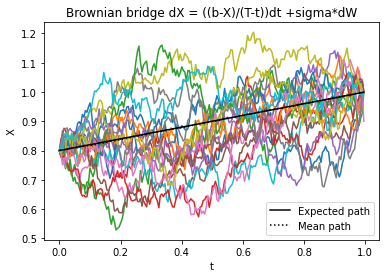

In [3]:
#Expected, mean and sample paths
plt.figure(1)
EX= a+(b-a)/T*t #Expected path
df=pd.concat([pd.Series(x) for x in X], axis=1)
df.index=t
mean_per_step=list(df.apply(lambda row: np.mean(row),axis=1)) #Mean path
for k in range(int(nsteps/10)):
    plt.plot(t,X[k])
plt.plot(t,EX,'k',label='Expected path')
plt.plot(t,mean_per_step,':k',label='Mean path')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()
#sdevmax=sigma*np.sqrt(T)/2
#plt.ylim([(a+b)/2-4*sdevmax,(a+b)/2+4*sdevmax])
plt.title('Brownian bridge dX = ((b-X)/(T-t))dt +sigma*dW')
plt.show()